Name: Het Monpara  
Enrollment : 202511016

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

In [79]:
image_files = []
for i in range(1, 11):
    filename = f"IMAGE_{i}.png"
    if os.path.exists(filename):
        image_files.append(filename)

print(f"Found {len(image_files)} images:")
for img_file in image_files:
    print(f"  - {img_file}")

Found 10 images:
  - IMAGE_1.png
  - IMAGE_2.png
  - IMAGE_3.png
  - IMAGE_4.png
  - IMAGE_5.png
  - IMAGE_6.png
  - IMAGE_7.png
  - IMAGE_8.png
  - IMAGE_9.png
  - IMAGE_10.png


In [80]:
my_images = []

for img_file in image_files:
    img = Image.open(img_file).convert('L')
    img_array = np.array(img)
    my_images.append(img_array)
    print(f"Loaded {img_file}: size {img_array.shape}")

print(f"\n Successfully loaded {len(my_images)} images!")

Loaded IMAGE_1.png: size (64, 72)
Loaded IMAGE_2.png: size (64, 72)
Loaded IMAGE_3.png: size (64, 72)
Loaded IMAGE_4.png: size (64, 72)
Loaded IMAGE_5.png: size (64, 72)
Loaded IMAGE_6.png: size (64, 72)
Loaded IMAGE_7.png: size (64, 72)
Loaded IMAGE_8.png: size (64, 72)
Loaded IMAGE_9.png: size (64, 72)
Loaded IMAGE_10.png: size (64, 72)

 Successfully loaded 10 images!


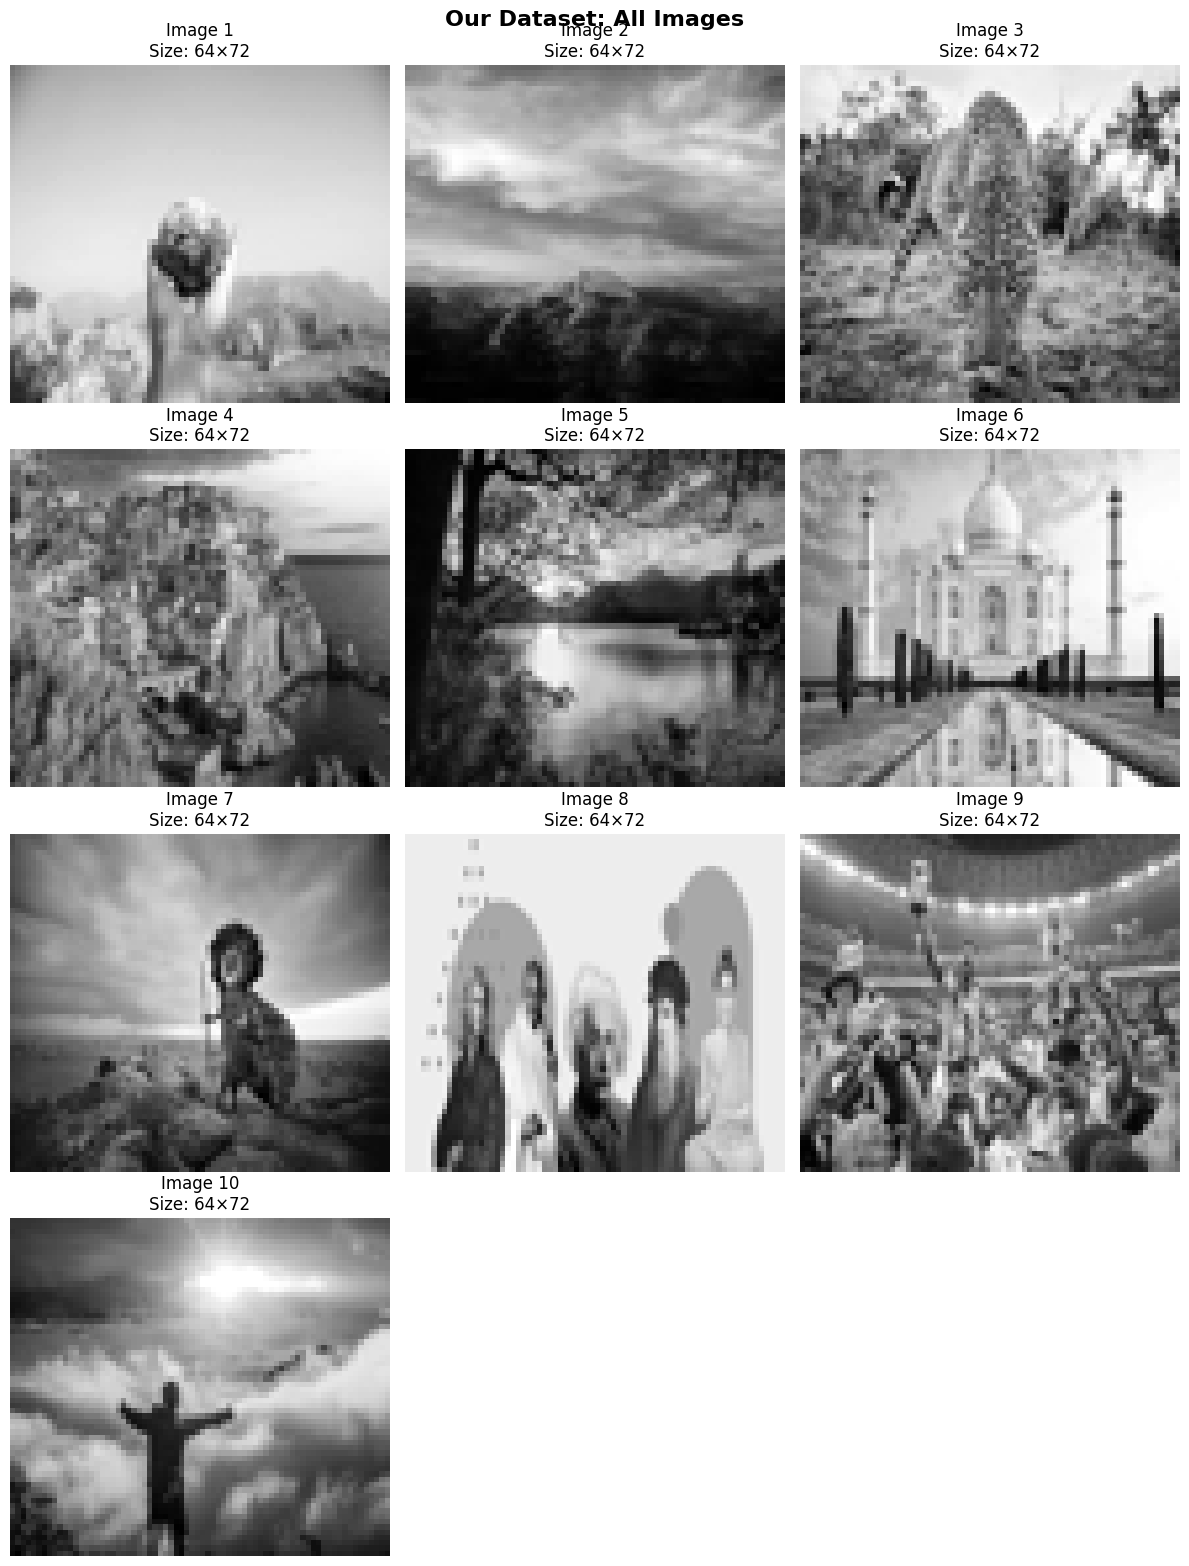

In [81]:
num_images = len(my_images)
cols = 3
rows = (num_images + cols - 1) // cols

plt.figure(figsize=(12, 4 * rows))
for i, img in enumerate(my_images):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f'Image {i+1}\nSize: {img.shape[0]}×{img.shape[1]}')
    plt.axis('off')

plt.suptitle('Our Dataset: All Images', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

---
## Part 1: Matrix Diagonalization

In [82]:
np.random.seed(42)
random_data = np.random.randn(10, 20)

my_matrix = np.cov(random_data)

print("Created our 10×10 matrix!")
print(f"Matrix size: {my_matrix.shape}")
print("\nFirst 10x10 corner of our matrix:")
print(np.round(my_matrix[:10, :10], 2))

Created our 10×10 matrix!
Matrix size: (10, 10)

First 10x10 corner of our matrix:
[[ 0.92 -0.15 -0.28 -0.03  0.21 -0.27 -0.11 -0.34 -0.09  0.22]
 [-0.15  0.94  0.09 -0.06  0.16 -0.2   0.05  0.15 -0.16  0.1 ]
 [-0.28  0.09  0.67 -0.16 -0.11  0.06 -0.01 -0.15  0.23  0.04]
 [-0.03 -0.06 -0.16  1.24 -0.07  0.29  0.51 -0.02 -0.16  0.15]
 [ 0.21  0.16 -0.11 -0.07  0.48 -0.02 -0.11 -0.11  0.02 -0.11]
 [-0.27 -0.2   0.06  0.29 -0.02  1.05  0.21 -0.23  0.3  -0.12]
 [-0.11  0.05 -0.01  0.51 -0.11  0.21  1.14 -0.21  0.03  0.15]
 [-0.34  0.15 -0.15 -0.02 -0.11 -0.23 -0.21  0.82 -0.15 -0.14]
 [-0.09 -0.16  0.23 -0.16  0.02  0.3   0.03 -0.15  1.01 -0.16]
 [ 0.22  0.1   0.04  0.15 -0.11 -0.12  0.15 -0.14 -0.16  0.54]]


In [83]:
eigenvalues, eigenvectors = np.linalg.eig(my_matrix)

order = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[order]
eigenvectors = eigenvectors[:, order]

print("Broke down our matrix into parts!")
print(f"Found {len(eigenvalues)} eigenvalues")
print("\nThe eigenvalues (from biggest to smallest):")
for i, val in enumerate(eigenvalues):
    print(f"  #{i+1}: {val:.4f}")

Broke down our matrix into parts!
Found 10 eigenvalues

The eigenvalues (from biggest to smallest):
  #1: 1.9779
  #2: 1.6193
  #3: 1.4092
  #4: 1.0448
  #5: 0.7817
  #6: 0.6625
  #7: 0.5665
  #8: 0.3898
  #9: 0.1900
  #10: 0.1600


In [84]:
print("Checking if all eigenvalues are positive...")
print("(For covariance matrices, they should all be ≥ 0)")
print()

all_good = True
for i, val in enumerate(eigenvalues):
    if val >= 0:
        status = "Good"
    else:
        status = " Problem"
        all_good = False
    print(f"Eigenvalue #{i+1}: {val:.6f} {status}")

print()
if all_good:
    print("AAll eigenvalues are positive!")
else:
    print("some eigenvalues are negative. That's unusual.")

Checking if all eigenvalues are positive...
(For covariance matrices, they should all be ≥ 0)

Eigenvalue #1: 1.977945 Good
Eigenvalue #2: 1.619304 Good
Eigenvalue #3: 1.409151 Good
Eigenvalue #4: 1.044763 Good
Eigenvalue #5: 0.781731 Good
Eigenvalue #6: 0.662509 Good
Eigenvalue #7: 0.566479 Good
Eigenvalue #8: 0.389758 Good
Eigenvalue #9: 0.189961 Good
Eigenvalue #10: 0.159982 Good

AAll eigenvalues are positive!


In [85]:
print("Checking if eigenvectors are orthogonal...")

result = np.dot(eigenvectors.T, eigenvectors)
identity = np.eye(10)

difference = np.max(np.abs(result - identity))
print(f"Maximum difference from identity matrix: {difference:.2e}")

if difference < 1e-10:
    print("Eigenvectors are orthogonal!")
else:
    print("Close, but not perfectly orthogonal.")

print("\nFirst 10×10 corner of eigenvectors^T × eigenvectors:")
print("(Should look like identity matrix - 1's on diagonal, 0's elsewhere)")
print(np.round(result[:10, :10], 6))

Checking if eigenvectors are orthogonal...
Maximum difference from identity matrix: 2.59e-15
Eigenvectors are orthogonal!

First 10×10 corner of eigenvectors^T × eigenvectors:
(Should look like identity matrix - 1's on diagonal, 0's elsewhere)
[[ 1.  0.  0.  0.  0.  0.  0. -0.  0.  0.]
 [ 0.  1. -0. -0. -0. -0.  0.  0.  0. -0.]
 [ 0. -0.  1. -0. -0. -0.  0. -0.  0.  0.]
 [ 0. -0. -0.  1.  0. -0. -0. -0. -0. -0.]
 [ 0. -0. -0.  0.  1. -0. -0. -0. -0. -0.]
 [ 0. -0. -0. -0. -0.  1.  0. -0. -0. -0.]
 [ 0.  0.  0. -0. -0.  0.  1. -0. -0. -0.]
 [-0.  0. -0. -0. -0. -0. -0.  1.  0. -0.]
 [ 0.  0.  0. -0. -0. -0. -0.  0.  1. -0.]
 [ 0. -0.  0. -0. -0. -0. -0. -0. -0.  1.]]


## Testing if we can rebuild our original matrix...

In [86]:


diagonal_matrix = np.diag(eigenvalues)

eigenvectors_inverse = np.linalg.inv(eigenvectors)
rebuilt_matrix = np.dot(np.dot(eigenvectors, diagonal_matrix), eigenvectors_inverse)

max_error = np.max(np.abs(my_matrix - rebuilt_matrix))
print(f"Maximum error in rebuilding: {max_error:.2e}")

if max_error < 1e-10:
    print("We can perfectly rebuild our matrix!")
else:
    print("Close, but not perfect.")

Maximum error in rebuilding: 1.44e-15
We can perfectly rebuild our matrix!


---
## Part 2a: Image Compression with SVD

Working with our first image
Image size: 64 rows × 72 columns
Total pixels: 4608
Pixel values range from 6 to 238


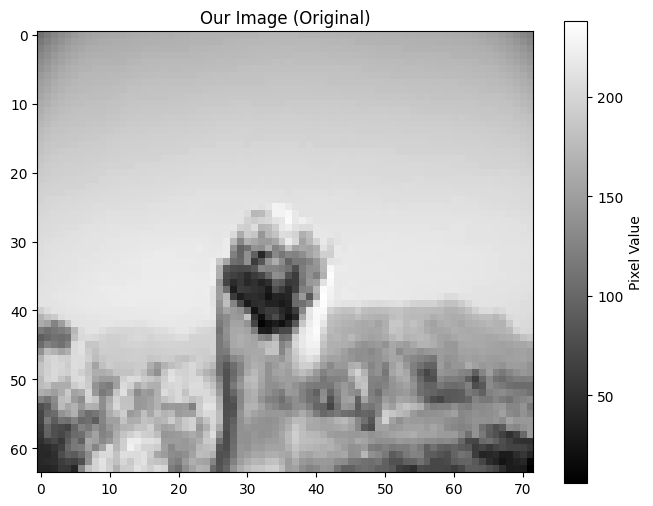

In [87]:
my_image = my_images[0].astype(float)

print(f"Working with our first image")
print(f"Image size: {my_image.shape[0]} rows × {my_image.shape[1]} columns")
print(f"Total pixels: {my_image.shape[0] * my_image.shape[1]}")
print(f"Pixel values range from {my_image.min():.0f} to {my_image.max():.0f}")

plt.figure(figsize=(8, 6))
plt.imshow(my_image, cmap='gray')
plt.title('Our Image (Original)')
plt.colorbar(label='Pixel Value')
plt.show()

In [88]:
print("Breaking down our image using SVD...")
print("This splits our image into 3 parts: Left × Middle × Right")

left_part, middle_part, right_part = np.linalg.svd(my_image, full_matrices=False)

print(f"\nSVD complete!")
print(f"Left part size: {left_part.shape}")
print(f"Middle part size: {middle_part.shape}")
print(f"Right part size: {right_part.shape}")

print(f"\nFirst 10 importance values:")
for i in range(min(10, len(middle_part))):
    print(f"Component {i+1}: {middle_part[i]:.2f}")

Breaking down our image using SVD...
This splits our image into 3 parts: Left × Middle × Right

SVD complete!
Left part size: (64, 64)
Middle part size: (64,)
Right part size: (64, 72)

First 10 importance values:
Component 1: 12078.06
Component 2: 1345.05
Component 3: 874.22
Component 4: 574.82
Component 5: 483.72
Component 6: 381.82
Component 7: 290.17
Component 8: 254.80
Component 9: 193.18
Component 10: 187.26


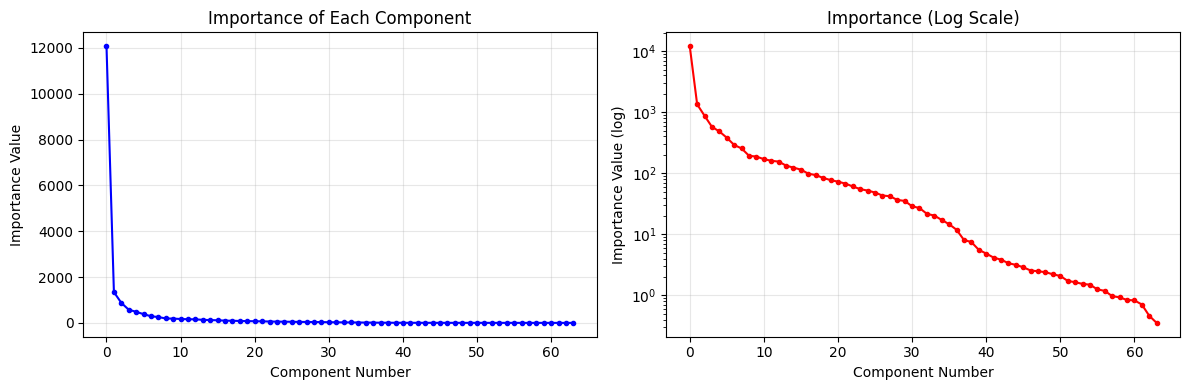

Notice how the first few components are much more important!
This is why we can compress images - we can ignore the less important parts.


In [89]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(middle_part, 'bo-', markersize=3)
plt.title('Importance of Each Component')
plt.xlabel('Component Number')
plt.ylabel('Importance Value')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.semilogy(middle_part, 'ro-', markersize=3)
plt.title('Importance (Log Scale)')
plt.xlabel('Component Number')
plt.ylabel('Importance Value (log)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Notice how the first few components are much more important!")
print("This is why we can compress images - we can ignore the less important parts.")

In [90]:
print("Creating compressed versions of our image...")

def compress_image(left, middle, right, num_components):
    """Compress image using only the first 'num_components' components"""
    left_compressed = left[:, :num_components]
    middle_compressed = middle[:num_components]
    right_compressed = right[:num_components, :]

    compressed = np.dot(left_compressed, np.dot(np.diag(middle_compressed), right_compressed))
    return compressed

compression_levels = [1, 5, 10, 20, 30, 50]
compressed_images = {}

for level in compression_levels:
    compressed_images[level] = compress_image(left_part, middle_part, right_part, level)
    print(f"Created version with {level} components")

Creating compressed versions of our image...
Created version with 1 components
Created version with 5 components
Created version with 10 components
Created version with 20 components
Created version with 30 components
Created version with 50 components


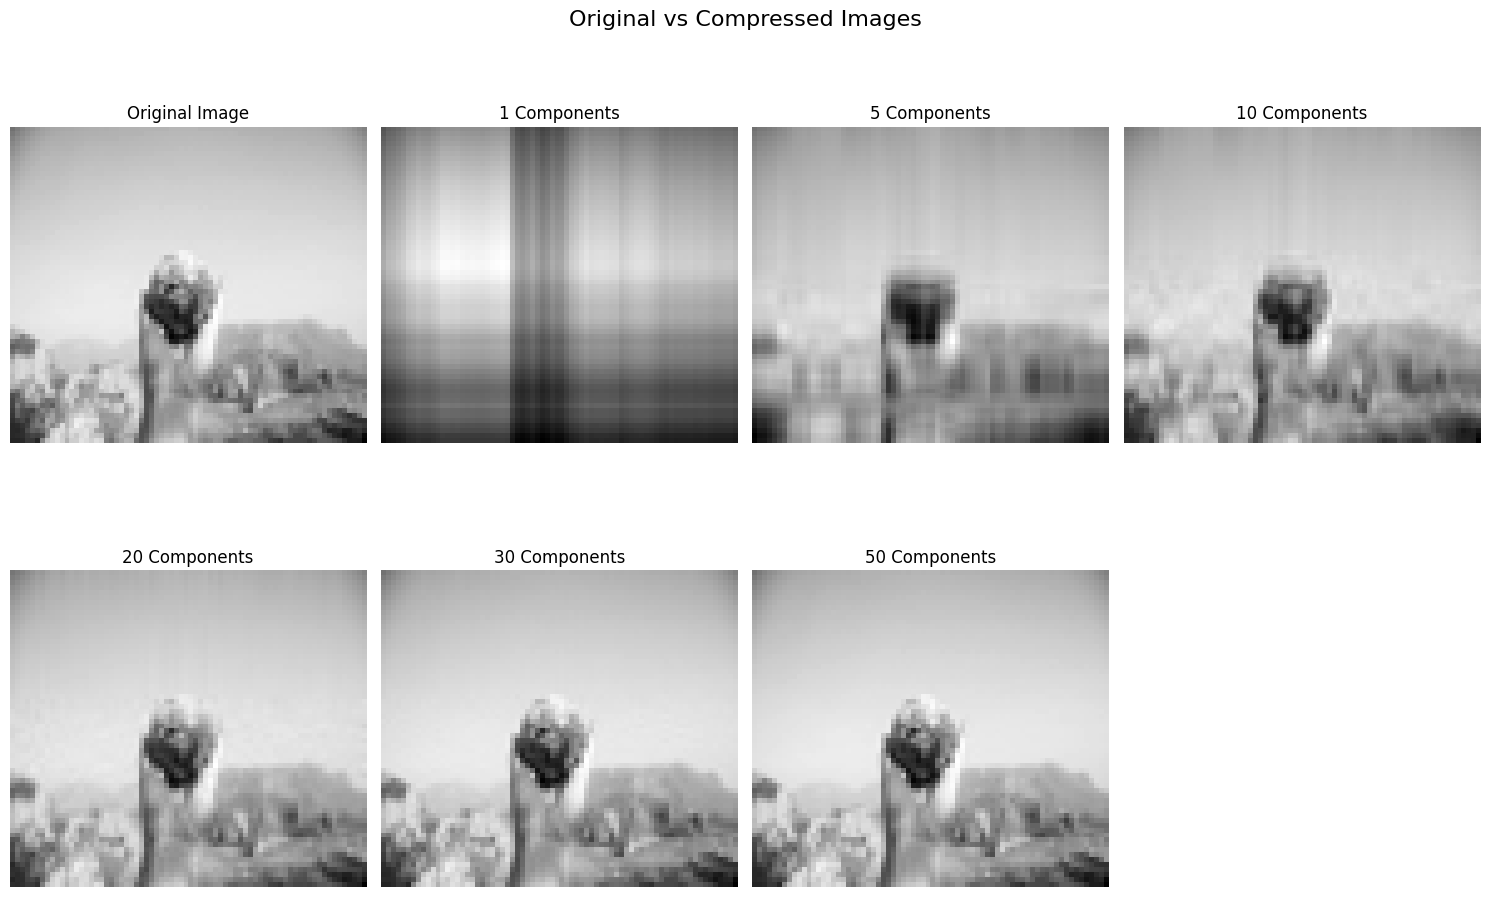

In [91]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 4, 1)
plt.imshow(my_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

positions = [2, 3, 4, 5, 6, 7]
for i, level in enumerate(compression_levels):
    plt.subplot(2, 4, positions[i])
    plt.imshow(compressed_images[level], cmap='gray')
    plt.title(f'{level} Components')
    plt.axis('off')

plt.suptitle('Original vs Compressed Images', fontsize=16)
plt.tight_layout()
plt.show()

In [92]:
print("Let's calculate how much storage space each version needs...")
print()

rows, cols = my_image.shape
original_storage = rows * cols

print(f"Original image storage: {original_storage} numbers")
print()
print("Compressed versions:")

for level in compression_levels:

    compressed_storage = (rows * level) + level + (level * cols)

    space_saved = original_storage - compressed_storage
    percent_saved = (space_saved / original_storage) * 100
    compression_ratio = original_storage / compressed_storage

    print(f"  {level:2d} components: {compressed_storage:5d} numbers "
          f"({percent_saved:4.1f}% saved, {compression_ratio:.1f}:1 ratio)")

Let's calculate how much storage space each version needs...

Original image storage: 4608 numbers

Compressed versions:
   1 components:   137 numbers (97.0% saved, 33.6:1 ratio)
   5 components:   685 numbers (85.1% saved, 6.7:1 ratio)
  10 components:  1370 numbers (70.3% saved, 3.4:1 ratio)
  20 components:  2740 numbers (40.5% saved, 1.7:1 ratio)
  30 components:  4110 numbers (10.8% saved, 1.1:1 ratio)
  50 components:  6850 numbers (-48.7% saved, 0.7:1 ratio)


Creating matrix B using 30 components (as requested in assignment)...
Matrix B created!
Matrix B size: (64, 72)

Comparing original image (A) and compressed image (B):
Maximum difference: 6.07
Average difference: 0.59
Are A and B exactly the same? False


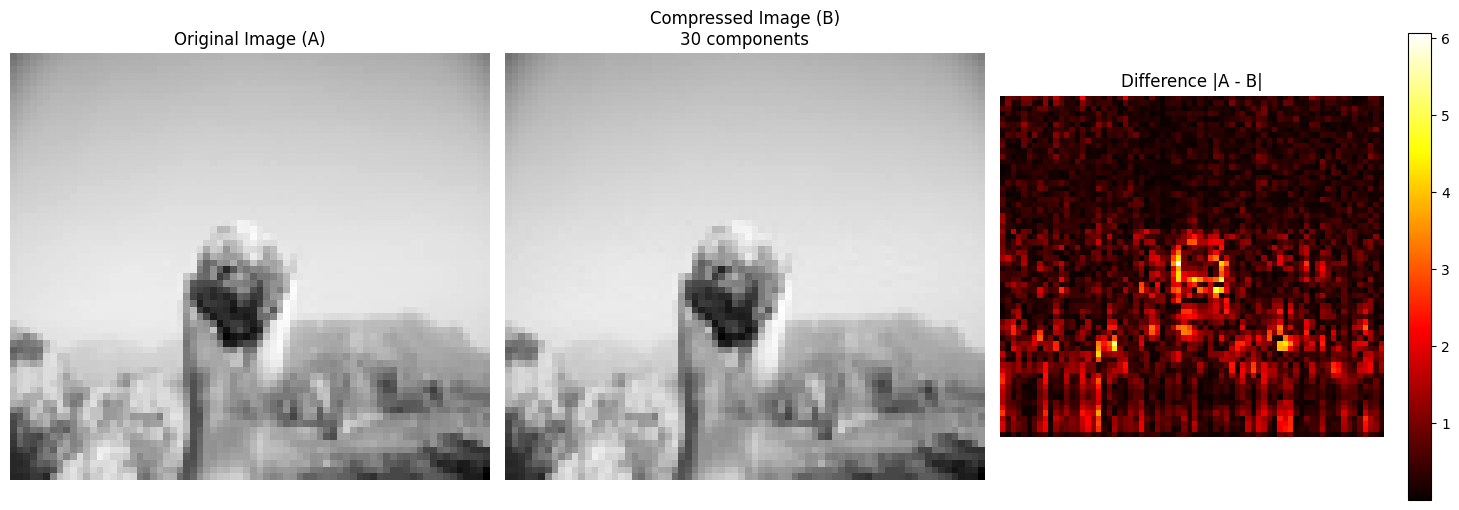

In [93]:
print("Creating matrix B using 30 components (as requested in assignment)...")

matrix_B = compress_image(left_part, middle_part, right_part, 30)

print(f"Matrix B created!")
print(f"Matrix B size: {matrix_B.shape}")

print(f"\nComparing original image (A) and compressed image (B):")
max_difference = np.max(np.abs(my_image - matrix_B))
average_difference = np.mean(np.abs(my_image - matrix_B))

print(f"Maximum difference: {max_difference:.2f}")
print(f"Average difference: {average_difference:.2f}")
print(f"Are A and B exactly the same? {np.allclose(my_image, matrix_B)}")

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(my_image, cmap='gray')
plt.title('Original Image (A)')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(matrix_B, cmap='gray')
plt.title('Compressed Image (B)\n30 components')
plt.axis('off')

plt.subplot(1, 3, 3)
difference_image = np.abs(my_image - matrix_B)
plt.imshow(difference_image, cmap='hot')
plt.title('Difference |A - B|')
plt.colorbar()
plt.axis('off')

plt.tight_layout()
plt.show()

In [94]:

def calculate_mse(original, compressed):
    """Calculate Mean Squared Error"""
    return np.mean((original - compressed) ** 2)

test_levels = list(range(1, min(51, my_image.shape[1]), 2))
mse_values = []

for level in test_levels:
    compressed = compress_image(left_part, middle_part, right_part, level)
    mse = calculate_mse(my_image, compressed)
    mse_values.append(mse)


    print(f"  {level:2d} components: MSE = {mse:.2f}")

print(f"\n Calculated MSE for {len(test_levels)} different compression levels!")

   1 components: MSE = 801.29
   3 components: MSE = 242.82
   5 components: MSE = 120.34
   7 components: MSE = 70.42
   9 components: MSE = 48.24
  11 components: MSE = 34.34
  13 components: MSE = 23.57
  15 components: MSE = 16.41
  17 components: MSE = 11.46
  19 components: MSE = 8.05
  21 components: MSE = 5.61
  23 components: MSE = 3.82
  25 components: MSE = 2.58
  27 components: MSE = 1.67
  29 components: MSE = 1.00
  31 components: MSE = 0.55
  33 components: MSE = 0.29
  35 components: MSE = 0.14
  37 components: MSE = 0.06
  39 components: MSE = 0.03
  41 components: MSE = 0.02
  43 components: MSE = 0.02
  45 components: MSE = 0.01
  47 components: MSE = 0.01
  49 components: MSE = 0.01

 Calculated MSE for 25 different compression levels!


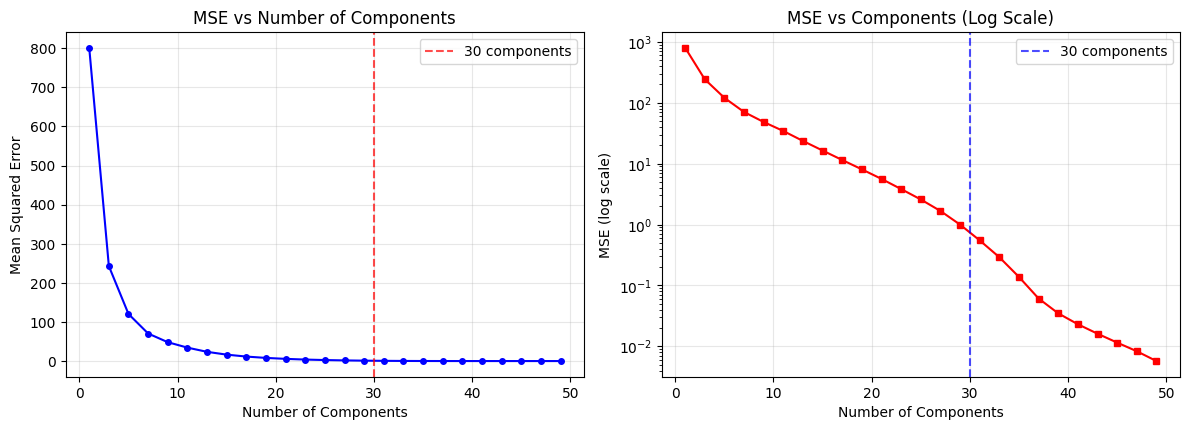

In [95]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(test_levels, mse_values, 'b-o', markersize=4)
plt.title('MSE vs Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Mean Squared Error')
plt.grid(True, alpha=0.3)
plt.axvline(x=30, color='red', linestyle='--', alpha=0.7, label='30 components')
plt.legend()

plt.subplot(2, 2, 2)
plt.semilogy(test_levels, mse_values, 'r-s', markersize=4)
plt.title('MSE vs Components (Log Scale)')
plt.xlabel('Number of Components')
plt.ylabel('MSE (log scale)')
plt.grid(True, alpha=0.3)
plt.axvline(x=30, color='blue', linestyle='--', alpha=0.7, label='30 components')
plt.legend()


plt.tight_layout()
plt.show()

1. **MSE goes down fast at first**: The first few components make a huge difference in image quality!

2. **Then it gets slower**: After about 20-30 components, adding more doesn't help as much.

3. **30 components is pretty good**: We can save a lot of space while keeping good quality.

4. **It's all about balance**: We want good quality but also want to save space.

**Why this happens**: The most important parts of the image are captured by the first few components. The later components mostly capture small details and noise.

---
## Part 2b: Covariance Matrix with Our Real Images

In [96]:
print(f"Preparing our {len(my_images)} images for analysis...")

image_shapes = [img.shape for img in my_images]
print("Image sizes:")
for i, shape in enumerate(image_shapes):
    print(f"  Image {i+1}: {shape[0]}×{shape[1]} = {shape[0]*shape[1]} pixels")

min_height = min(shape[0] for shape in image_shapes)
min_width = min(shape[1] for shape in image_shapes)

print(f"\nResize all images to: {min_height}×{min_width}")

Preparing our 10 images for analysis...
Image sizes:
  Image 1: 64×72 = 4608 pixels
  Image 2: 64×72 = 4608 pixels
  Image 3: 64×72 = 4608 pixels
  Image 4: 64×72 = 4608 pixels
  Image 5: 64×72 = 4608 pixels
  Image 6: 64×72 = 4608 pixels
  Image 7: 64×72 = 4608 pixels
  Image 8: 64×72 = 4608 pixels
  Image 9: 64×72 = 4608 pixels
  Image 10: 64×72 = 4608 pixels

Resize all images to: 64×72


In [97]:
print(" Resizing and flattening all images...")

processed_images = []
for i, img in enumerate(my_images):
    cropped = img[:min_height, :min_width]
    flattened = cropped.flatten().astype(float)
    processed_images.append(flattened)
    print(f"  Image {i+1}: {cropped.shape} → {len(flattened)} pixels")

num_pixels = len(processed_images[0])
num_images = len(processed_images)

data_matrix = np.zeros((num_pixels, num_images))
for i, img_data in enumerate(processed_images):
    data_matrix[:, i] = img_data

print(f"\nCreated data matrix: {data_matrix.shape}")
print(f"{data_matrix.shape[0]} pixels × {data_matrix.shape[1]} images")

 Resizing and flattening all images...
  Image 1: (64, 72) → 4608 pixels
  Image 2: (64, 72) → 4608 pixels
  Image 3: (64, 72) → 4608 pixels
  Image 4: (64, 72) → 4608 pixels
  Image 5: (64, 72) → 4608 pixels
  Image 6: (64, 72) → 4608 pixels
  Image 7: (64, 72) → 4608 pixels
  Image 8: (64, 72) → 4608 pixels
  Image 9: (64, 72) → 4608 pixels
  Image 10: (64, 72) → 4608 pixels

Created data matrix: (4608, 10)
4608 pixels × 10 images


In [98]:
print("Method 2: SVD-based covariance calculation...")
print("This should give us the exact same result!")

image_means = np.mean(data_matrix, axis=0)
centered_data = data_matrix - image_means.reshape(1, -1)

print("Step 1: Subtracted mean from each image")
print("New means (should be close to 0):")
new_means = np.mean(centered_data, axis=0)
for i, mean_val in enumerate(new_means):
    print(f"  Image {i+1}: {mean_val:.2e}")

print("\nStep 2: Applying SVD to centered data...")
U_svd, sigma_svd, VT_svd = np.linalg.svd(centered_data, full_matrices=False)

print(f"SVD results:")
print(f"  U: {U_svd.shape}")
print(f"  σ: {sigma_svd.shape}")
print(f"  V^T: {VT_svd.shape}")

print("\nStep 3: Computing covariance from SVD components...")
sigma_squared = np.diag(sigma_svd**2)
svd_covariance = np.dot(VT_svd.T, np.dot(sigma_squared, VT_svd)) / (num_pixels - 1)

print(f"SVD covariance matrix created: {svd_covariance.shape}")

Method 2: SVD-based covariance calculation...
This should give us the exact same result!
Step 1: Subtracted mean from each image
New means (should be close to 0):
  Image 1: 1.05e-12
  Image 2: 3.44e-12
  Image 3: 1.42e-12
  Image 4: -1.37e-12
  Image 5: 4.70e-13
  Image 6: 1.34e-12
  Image 7: -1.17e-12
  Image 8: 0.00e+00
  Image 9: 3.48e-13
  Image 10: 1.20e-12

Step 2: Applying SVD to centered data...
SVD results:
  U: (4608, 10)
  σ: (10,)
  V^T: (10, 10)

Step 3: Computing covariance from SVD components...
SVD covariance matrix created: (10, 10)


Comparing both methods...
They should give exactly the same result!

Comparison results:
Maximum difference: 3.64e-12
Average difference: 1.13e-12
Are they the same? True

 Perfect! Both methods give identical results!


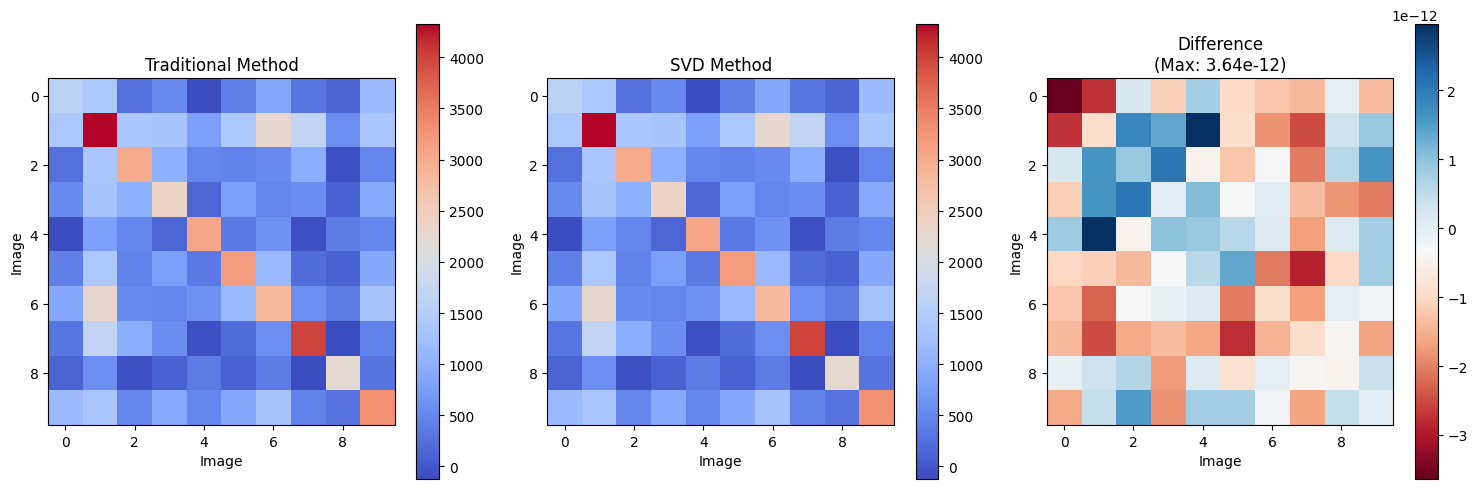

In [99]:
print("Comparing both methods...")
print("They should give exactly the same result!")

difference = traditional_covariance - svd_covariance
max_diff = np.max(np.abs(difference))
avg_diff = np.mean(np.abs(difference))

print(f"\nComparison results:")
print(f"Maximum difference: {max_diff:.2e}")
print(f"Average difference: {avg_diff:.2e}")
print(f"Are they the same? {np.allclose(traditional_covariance, svd_covariance)}")

if max_diff < 1e-10:
    print("\n Perfect! Both methods give identical results!")
else:
    print("\n Small differences found (probably due to computer precision)")

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

im1 = axes[0].imshow(traditional_covariance, cmap='coolwarm')
axes[0].set_title('Traditional Method')
axes[0].set_xlabel('Image')
axes[0].set_ylabel('Image')
plt.colorbar(im1, ax=axes[0])

im2 = axes[1].imshow(svd_covariance, cmap='coolwarm')
axes[1].set_title('SVD Method')
axes[1].set_xlabel('Image')
axes[1].set_ylabel('Image')
plt.colorbar(im2, ax=axes[1])

im3 = axes[2].imshow(difference, cmap='RdBu')
axes[2].set_title(f'Difference\n(Max: {max_diff:.2e})')
axes[2].set_xlabel('Image')
axes[2].set_ylabel('Image')
plt.colorbar(im3, ax=axes[2])

plt.tight_layout()
plt.show()
